# Exploratory Data Analysis

created_by: Promise Ekeh

Date: 17/05/2024

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [3]:
#printing out versions of all packages and libraries and used

print(f'pandas version is: {pd.__version__}')
print(f'numpy version is: {np.__version__}')
print(f'matplotlib version is: {matplotlib.__version__}')

pandas version is: 2.2.1
numpy version is: 1.26.4
matplotlib version is: 3.8.3


# data

https://github.com/bolgebrygg/Force-2020-Machine-Learning-competition/tree/master/lithology_competition/data

In [4]:
data = pd.read_csv("../data/train.csv", sep=';')
data

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.5280,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.6800,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.8320,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.9840,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.1360,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,7/1-2 S,3169.3124,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.423170,NaN,NaN,...,27.674368,NaN,NaN,-0.001763,NaN,NaN,26.673708,NaN,30000,2.0
1170507,7/1-2 S,3169.4644,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.379244,NaN,NaN,...,28.024338,NaN,NaN,-0.007600,NaN,NaN,26.840818,NaN,65030,2.0
1170508,7/1-2 S,3169.6164,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.350248,NaN,NaN,...,28.091282,NaN,NaN,-0.018297,NaN,NaN,27.007942,NaN,65030,2.0
1170509,7/1-2 S,3169.7684,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.313779,NaN,NaN,...,28.019775,NaN,NaN,-0.011438,NaN,NaN,27.175179,NaN,65030,2.0


In [5]:
# hidden_test = pd.read_csv("../data/test_features.csv", sep=';')
# hidden_test

In [6]:
data.shape

(1170511, 29)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 29 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   WELL                               1170511 non-null  object 
 1   DEPTH_MD                           1170511 non-null  float64
 2   X_LOC                              1159736 non-null  float64
 3   Y_LOC                              1159736 non-null  float64
 4   Z_LOC                              1159736 non-null  float64
 5   GROUP                              1169233 non-null  object 
 6   FORMATION                          1033517 non-null  object 
 7   CALI                               1082634 non-null  float64
 8   RSHA                               630650 non-null   float64
 9   RMED                               1131518 non-null  float64
 10  RDEP                               1159496 non-null  float64
 11  RHOB                    

In [8]:
data.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,1.170511e+06,1.159736e+06,1.159736e+06,1.159736e+06,1.082634e+06,630650.000000,1.131518e+06,1.159496e+06,1.009242e+06,1.170511e+06,...,535071.000000,174613.000000,298833.000000,987857.000000,316151.000000,176160.000000,192325.000000,327427.000000,1.170511e+06,1.170332e+06
mean,2.184087e+03,4.856310e+05,6.681276e+06,-2.138527e+03,1.318568e+01,10.694664,4.986978e+00,1.069103e+01,2.284987e+00,7.091370e+01,...,137.367965,204.655019,1.223849,0.012196,1.216329,7.796809,23.505069,-95.779496,6.138598e+04,1.164258e+00
std,9.971821e+02,3.455641e+04,1.281524e+05,9.709426e+02,3.798907e+00,100.642597,5.467269e+01,1.139480e+02,2.532835e-01,3.423149e+01,...,1539.383558,71.068461,54.372859,7.477798,10.180834,89.741807,22.632800,348.980030,1.389170e+04,4.451180e-01
min,1.360860e+02,4.268988e+05,6.406641e+06,-5.395563e+03,2.344000e+00,0.000100,-8.418695e-03,3.170056e-02,7.209712e-01,1.092843e-01,...,-0.117977,69.163177,-12.215459,-7429.338867,0.125818,0.056586,-999.250122,-999.900024,3.000000e+04,1.000000e+00
25%,1.418597e+03,4.547996e+05,6.591327e+06,-2.811502e+03,9.429712e+00,0.854120,9.140862e-01,9.102396e-01,2.092203e+00,4.762722e+01,...,5.628000,155.936707,0.148438,-0.009253,0.143792,0.891272,11.281895,0.687681,6.500000e+04,1.000000e+00
50%,2.076605e+03,4.769203e+05,6.737311e+06,-2.042785e+03,1.255575e+01,1.399020,1.443584e+00,1.439000e+00,2.321228e+00,6.836763e+01,...,17.799999,188.200653,0.557320,0.001752,0.155774,1.967156,20.131153,1.366672,6.500000e+04,1.000000e+00
75%,2.864393e+03,5.201532e+05,6.784886e+06,-1.391866e+03,1.671075e+01,3.099348,2.680930e+00,2.557220e+00,2.488580e+00,8.903551e+01,...,34.812794,224.645081,1.299655,0.021702,1.168307,5.084564,31.138481,3.420790,6.500000e+04,1.000000e+00
max,5.436632e+03,5.726328e+05,6.856661e+06,-1.110860e+02,2.827900e+01,2193.904541,1.988616e+03,1.999887e+03,3.457820e+00,1.076964e+03,...,47015.125000,676.578125,10011.422852,2.836938,185.730927,10000.000000,742.797852,35930.671875,9.900000e+04,3.000000e+00


# Missing data

In [9]:
data.isna().sum()

WELL                                       0
DEPTH_MD                                   0
X_LOC                                  10775
Y_LOC                                  10775
Z_LOC                                  10775
GROUP                                   1278
FORMATION                             136994
CALI                                   87877
RSHA                                  539861
RMED                                   38993
RDEP                                   11015
RHOB                                  161269
GR                                         0
SGR                                  1101158
NPHI                                  405102
PEF                                   498819
DTC                                    80863
SP                                    306264
BS                                    487854
ROP                                   635440
DTS                                   995898
DCAL                                  871678
DRHO      

In [10]:
data=data.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY': 'LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE':'CONFIDENCE'})

In [11]:
def get_available_data (data):
    well_dict=data.notna().sum().to_dict()
    available= pd.DataFrame()
    available[['log', 'data_count']]=well_dict.keys(), well_dict.values()
    available['percent'] = available['data_count']/data.shape[0] *100
    return available


def plot_available_data(data, percentage= True):
    df= get_available_data(data)
    plt.figure(figsize=(14, 7))
    if percentage:
        plt.bar(df.log, df.percent)
        plt.xticks(rotation=45)
        plt.ylabel('Well presence (\%)');
        plt.title('Available Data (%)')
    else:
        plt.bar(df.log, df.data_count)
        plt.xticks(rotation=45)
        plt.ylabel('Well presence');
        plt.title('Available Data (count)')
        

<>:15: SyntaxWarning: invalid escape sequence '\%'
<>:15: SyntaxWarning: invalid escape sequence '\%'
C:\Users\promi\AppData\Local\Temp\ipykernel_488\3761119093.py:15: SyntaxWarning: invalid escape sequence '\%'
  plt.ylabel('Well presence (\%)');


In [12]:
# occurences = np.zeros(25) # number of columns
# for well in data['WELL'].unique():
#     occurences += data[data['WELL'] == well].isna().all().astype(int).values[2:-2] # 2:, -2 removes first and last 2 columns
# fig, ax = plt.subplots(1, 1, figsize=(14, 7))
# ax.bar(x=np.arange(occurences.shape[0]), height=(data.WELL.unique().shape[0]-occurences)/data.WELL.unique().shape[0]*100.0)
# ax.set_xticklabels(data.columns[2:-2], rotation=45)
# ax.set_xticks(np.arange(occurences.shape[0]))
# ax.set_ylabel('Well presence (\%)');

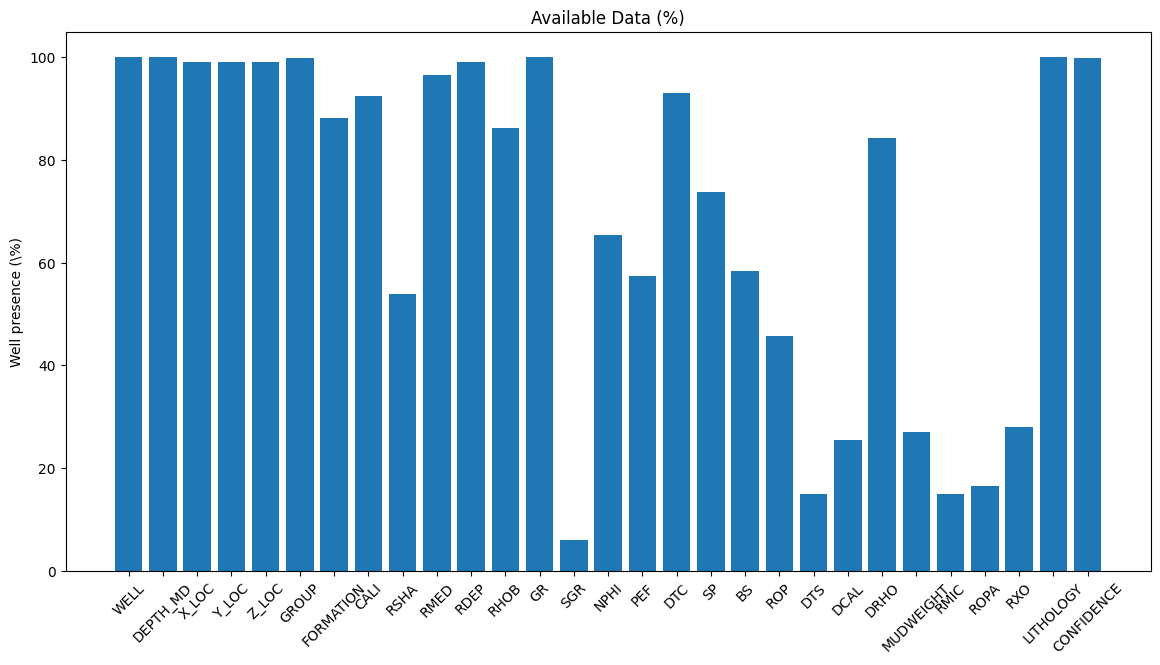

In [13]:
plot_available_data(data)

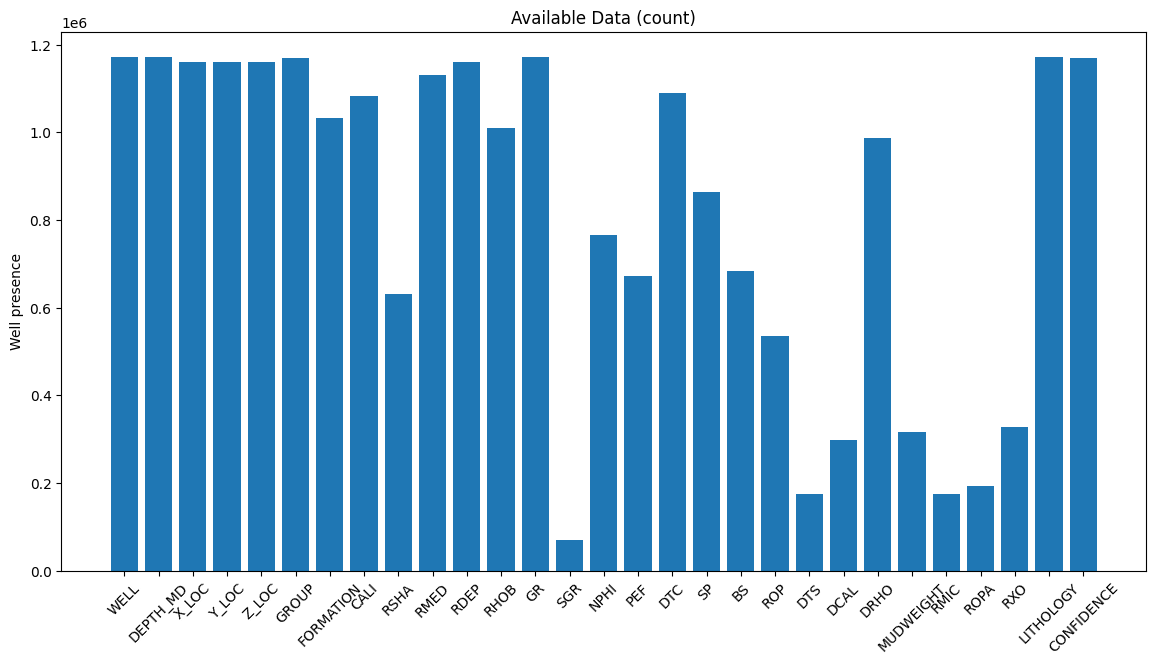

In [14]:
plot_available_data(data, percentage=False)

In [15]:
# !pip install missingno #to install the package
import missingno
import matplotlib.patches as mpatches

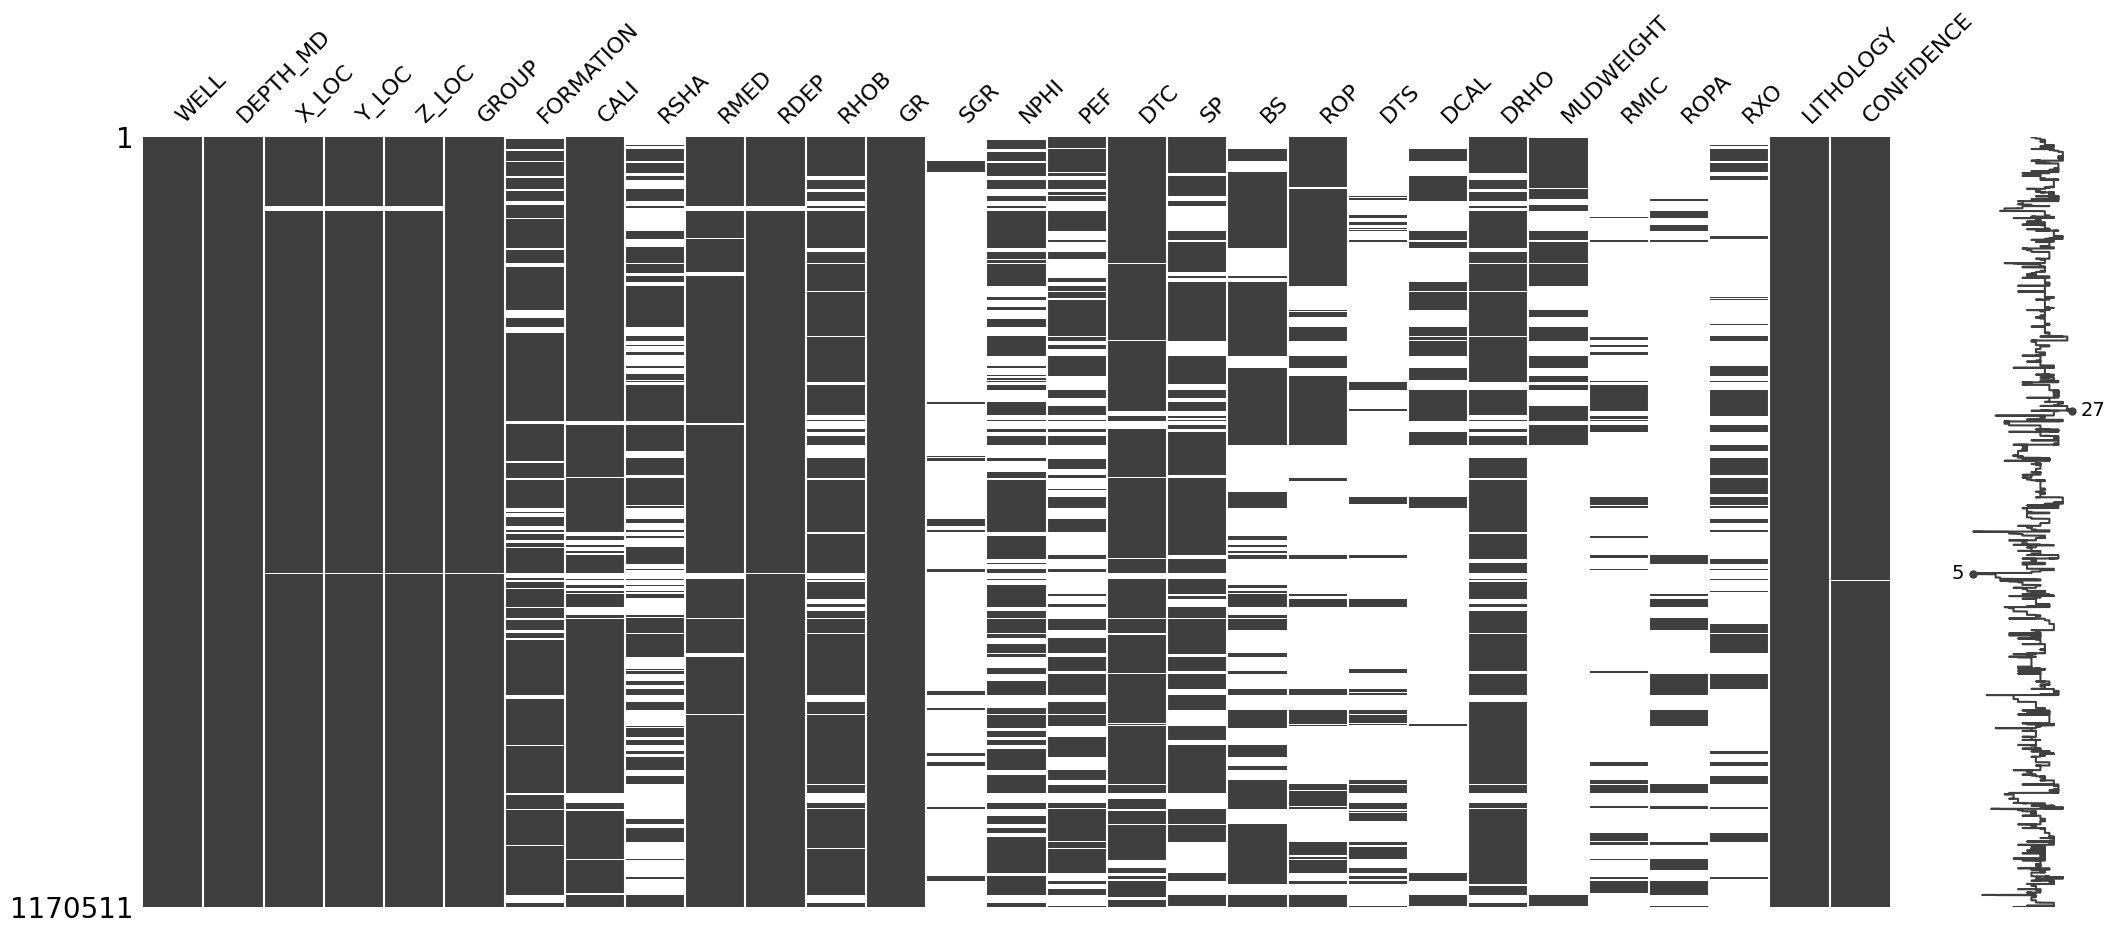

In [16]:
# from one of the participants 
missingno.matrix(data);
colors = ["g", "w"]
gray_patch = mpatches.Patch(color='green', label='Data present')
white_patch = mpatches.Patch(color='white', label='Data absent ')
#plt.legend(handles=[gray_patch, white_patch],loc ="best", bbox_to_anchor=(1, 0.5), prop={'size': 20})
# plt.savefig("./images/Missing-Log2.png");
plt.show()

In [17]:
data['CONFIDENCE'].unique()

array([ 1.,  3.,  2., nan])

In [18]:
data['CONFIDENCE'].value_counts()

CONFIDENCE
1.0    1013705
2.0     121018
3.0      35609
Name: count, dtype: int64

In [19]:
data['LITHOLOGY'].value_counts()

LITHOLOGY
65000    720803
30000    168937
65030    150455
70000     56320
80000     33329
99000     15245
70032     10513
88000      8213
90000      3820
74000      1688
86000      1085
93000       103
Name: count, dtype: int64

<Axes: xlabel='LITHOLOGY'>

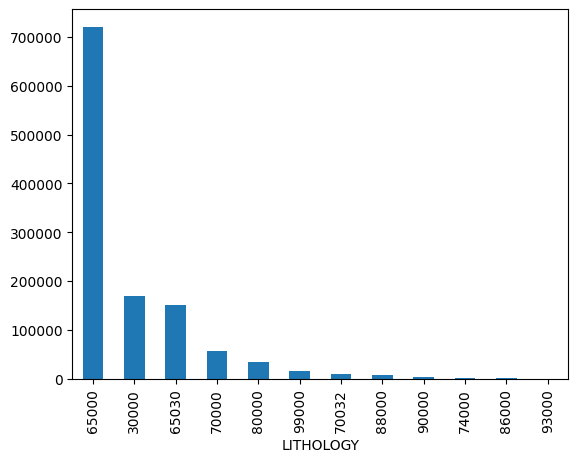

In [20]:
data['LITHOLOGY'].value_counts().plot(kind='bar')

In [21]:
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

data['LITH']= data['LITHOLOGY'].map(lithology_keys)

<Axes: xlabel='LITHOLOGY'>

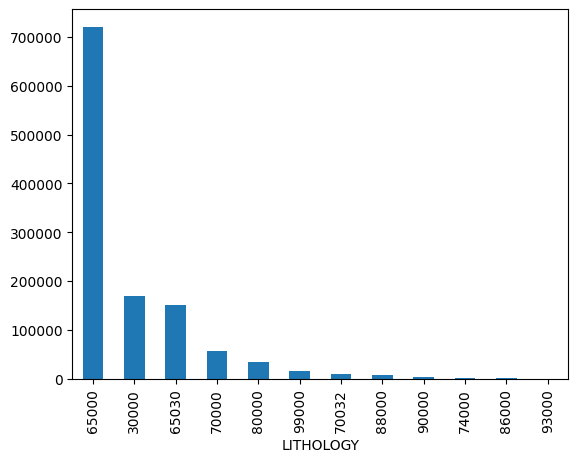

In [22]:
data['LITHOLOGY'].value_counts().plot(kind='bar')

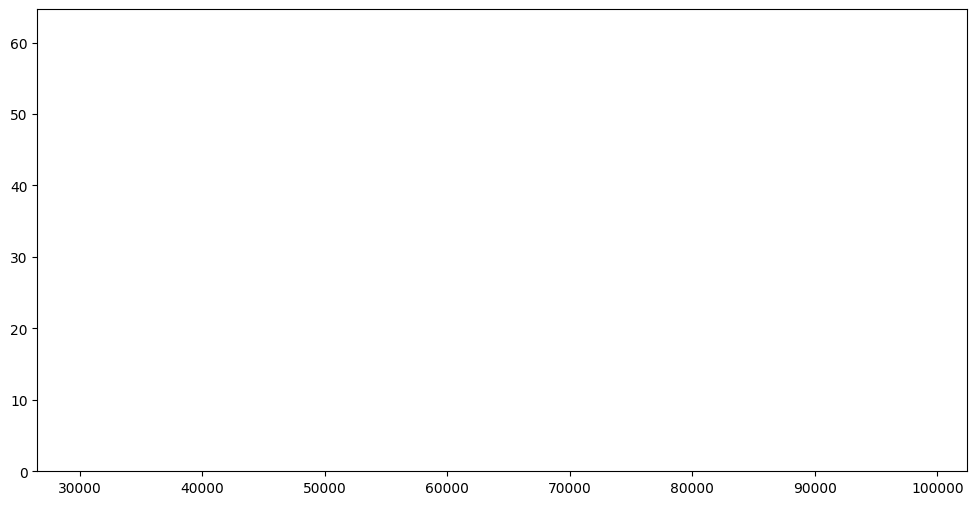

In [23]:
label_dict= dict(data['LITHOLOGY'].value_counts())
fig = plt.figure(figsize=(12, 6))
plt.bar(label_dict.keys(), (np.array(list(label_dict.values()))/data.shape[0]) * 100);

In [24]:
data.isna().sum()

WELL                0
DEPTH_MD            0
X_LOC           10775
Y_LOC           10775
Z_LOC           10775
GROUP            1278
FORMATION      136994
CALI            87877
RSHA           539861
RMED            38993
RDEP            11015
RHOB           161269
GR                  0
SGR           1101158
NPHI           405102
PEF            498819
DTC             80863
SP             306264
BS             487854
ROP            635440
DTS            995898
DCAL           871678
DRHO           182654
MUDWEIGHT      854360
RMIC           994351
ROPA           978186
RXO            843084
LITHOLOGY           0
CONFIDENCE        179
LITH                0
dtype: int64

In [25]:
# get str column
# df.select_dtypes(exclude=['float64', 'int64'])

In [26]:
log= ['Z_LOC', 'DEPTH_MD','CALI', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'BS', 'PEF', 'DTC', 'SP', ]
df=data[log]
df

,Z_LOC,DEPTH_MD,CALI,RMED,RDEP,RHOB,GR,NPHI,BS,PEF,DTC,SP
0,-469.501831,494.5280,19.480835,1.611410,1.798681,1.884186,80.200851,NaN,NaN,20.915468,161.131180,24.612379
1,-469.653809,494.6800,19.468800,1.618070,1.795641,1.889794,79.262886,NaN,NaN,19.383013,160.603470,23.895531
2,-469.805786,494.8320,19.468800,1.626459,1.800733,1.896523,74.821999,NaN,NaN,22.591518,160.173615,23.916357
3,-469.957794,494.9840,19.459282,1.621594,1.801517,1.891913,72.878922,NaN,NaN,32.191910,160.149429,23.793688
4,-470.109772,495.1360,19.453100,1.602679,1.795299,1.880034,71.729141,NaN,NaN,38.495632,160.128342,24.104078
...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,NaN,3169.3124,8.423170,NaN,NaN,2.527984,77.654900,NaN,8.5,4.586425,NaN,NaN
1170507,NaN,3169.4644,8.379244,NaN,NaN,2.537613,75.363937,NaN,8.5,7.019858,NaN,NaN
1170508,NaN,3169.6164,8.350248,NaN,NaN,2.491860,66.452843,NaN,8.5,9.049782,NaN,NaN
1170509,NaN,3169.7684,8.313779,NaN,NaN,2.447539,55.784817,NaN,8.5,8.903917,NaN,NaN


## Corr Matrix

In [27]:
corr_matrix = df.corr()
corr_matrix

,Z_LOC,DEPTH_MD,CALI,RMED,RDEP,...,NPHI,BS,PEF,DTC,SP
Z_LOC,1.000000,-0.994761,0.577283,-0.040089,-0.053246,...,0.551328,0.589167,-0.034736,0.781330,-0.033998
DEPTH_MD,-0.994761,1.000000,-0.583351,0.055476,0.051349,...,-0.544272,-0.589287,0.027801,-0.777914,0.034592
CALI,0.577283,-0.583351,1.000000,-0.042424,-0.030207,...,0.446972,0.903260,0.049174,0.588739,-0.033151
RMED,-0.040089,0.055476,-0.042424,1.000000,0.131140,...,-0.046519,-0.089160,0.055052,-0.095603,-0.022370
RDEP,-0.053246,0.051349,-0.030207,0.131140,1.000000,...,-0.181104,-0.038446,-0.005872,-0.105184,-0.021965
RHOB,-0.743765,0.741904,-0.570643,-0.008321,-0.039025,...,-0.623808,-0.484052,-0.094279,-0.825593,0.057665
GR,-0.088711,0.098282,-0.240646,-0.015930,-0.097851,...,0.222430,-0.135337,-0.080795,0.022096,0.095809
NPHI,0.551328,-0.544272,0.446972,-0.046519,-0.181104,...,1.000000,0.351148,0.022899,0.788425,-0.112908
BS,0.589167,-0.589287,0.903260,-0.089160,-0.038446,...,0.351148,1.000000,0.079112,0.544480,0.085211
PEF,-0.034736,0.027801,0.049174,0.055052,-0.005872,...,0.022899,0.079112,1.000000,0.026209,-0.005365


<Axes: >

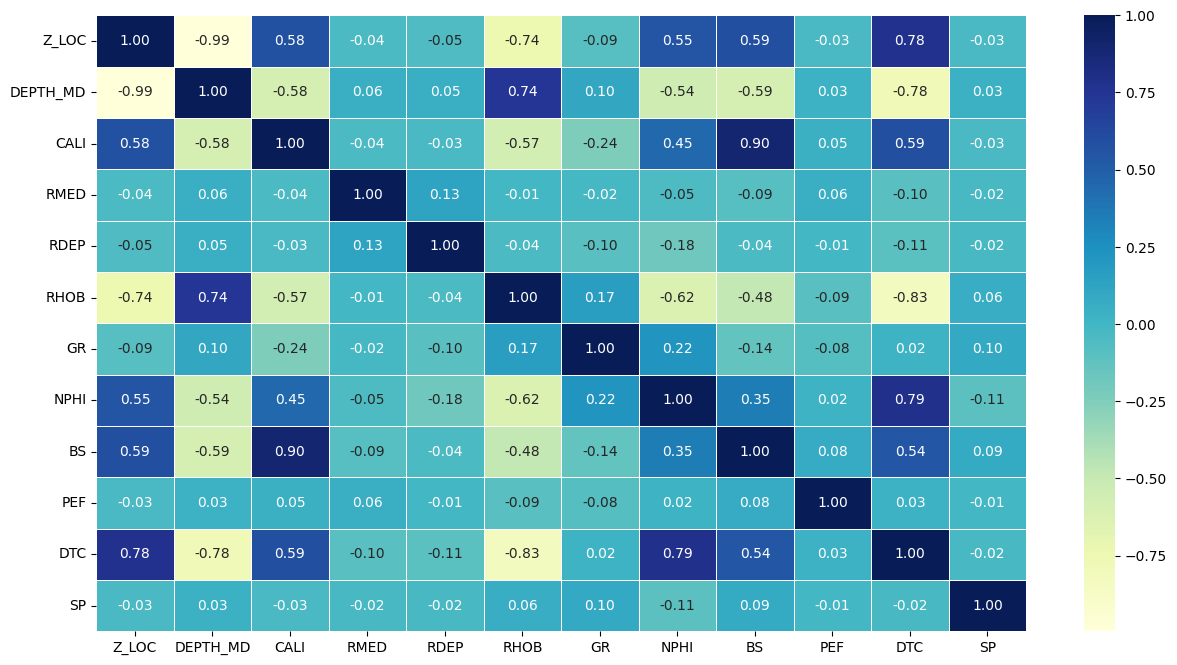

In [28]:
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu",
                 )

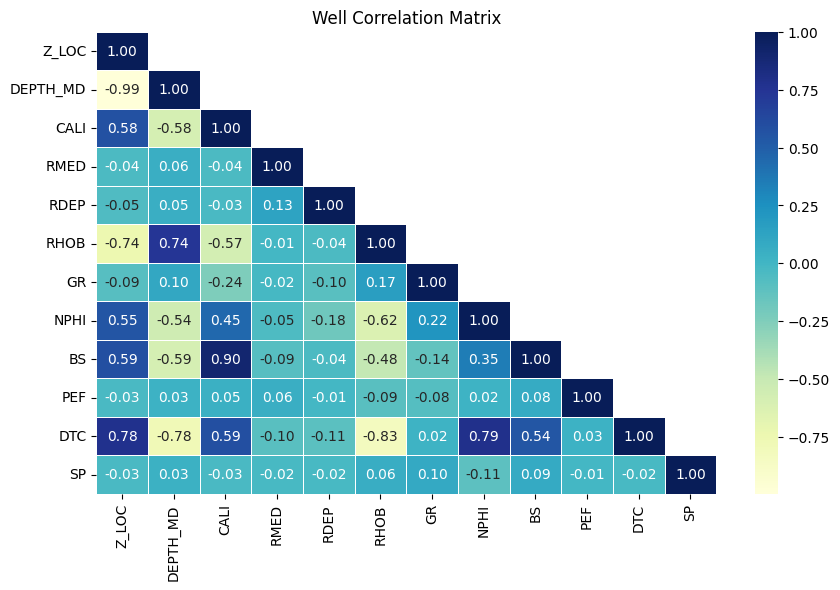

In [29]:
cm_tril=corr_matrix.where(np.tril(np.ones_like(corr_matrix, dtype=bool)))
# cm_tril=corr_matrix.where(np.triu(np.ones_like(corr_matrix, dtype=bool)))
plt.figure(figsize=(10, 6))
sns.heatmap(cm_tril,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu",
                 )
plt.title('Well Correlation Matrix');

## Hist



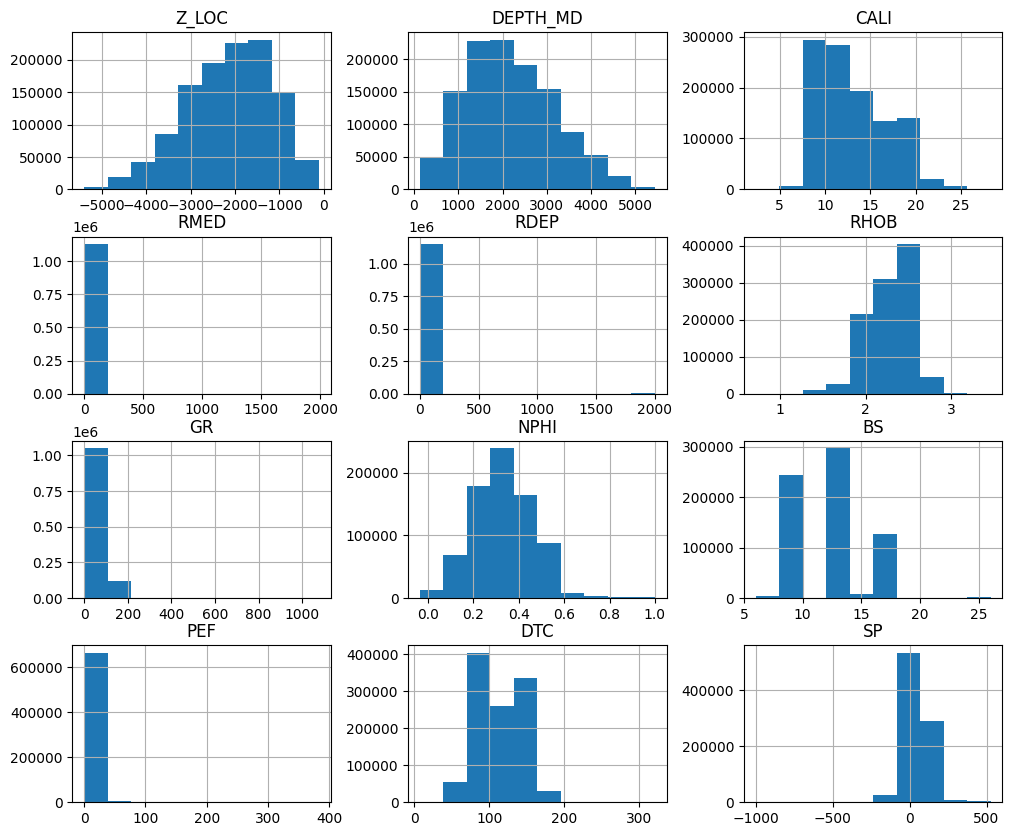

In [30]:
df[log].hist(figsize=(12, 10));

In [31]:
data['LITHOLOGY'].unique()

array([65000, 30000, 65030, 70000, 99000, 80000, 86000, 74000, 70032,
       90000, 88000, 93000], dtype=int64)

# plot location

plot well location on map
size of points should be how many well logs present
use plotly

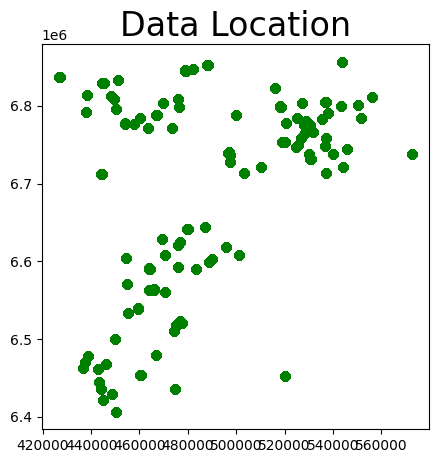

In [32]:
plt.figure(figsize=(5,5))
plt.scatter(data['X_LOC'], data['Y_LOC'], label='Train', c='g')
plt.title('Data Location', fontsize=24)
plt.show();


# individual well analysis

In [33]:
wells = list(data['WELL'].unique())
# wells
well=wells[0]
well

'15/9-13'

In [34]:
well_data=data[data['WELL']==well]
well_data

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,...,ROPA,RXO,LITHOLOGY,CONFIDENCE,LITH
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,...,NaN,NaN,65000,1.0,Shale
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,...,NaN,NaN,65000,1.0,Shale
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,...,NaN,NaN,65000,1.0,Shale
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,...,NaN,NaN,65000,1.0,Shale
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,...,NaN,NaN,65000,1.0,Shale
...,...,...,...,...,...,...,...,...,...,...,...
18265,15/9-13,3271.416,437593.40625,6470983.0,-3245.549316,...,NaN,NaN,74000,3.0,Dolomite
18266,15/9-13,3271.568,437593.37500,6470983.0,-3245.700928,...,NaN,NaN,74000,3.0,Dolomite
18267,15/9-13,3271.720,437593.37500,6470983.0,-3245.852539,...,NaN,NaN,74000,3.0,Dolomite
18268,15/9-13,3271.872,437593.37500,6470983.0,-3246.004395,...,NaN,NaN,74000,3.0,Dolomite


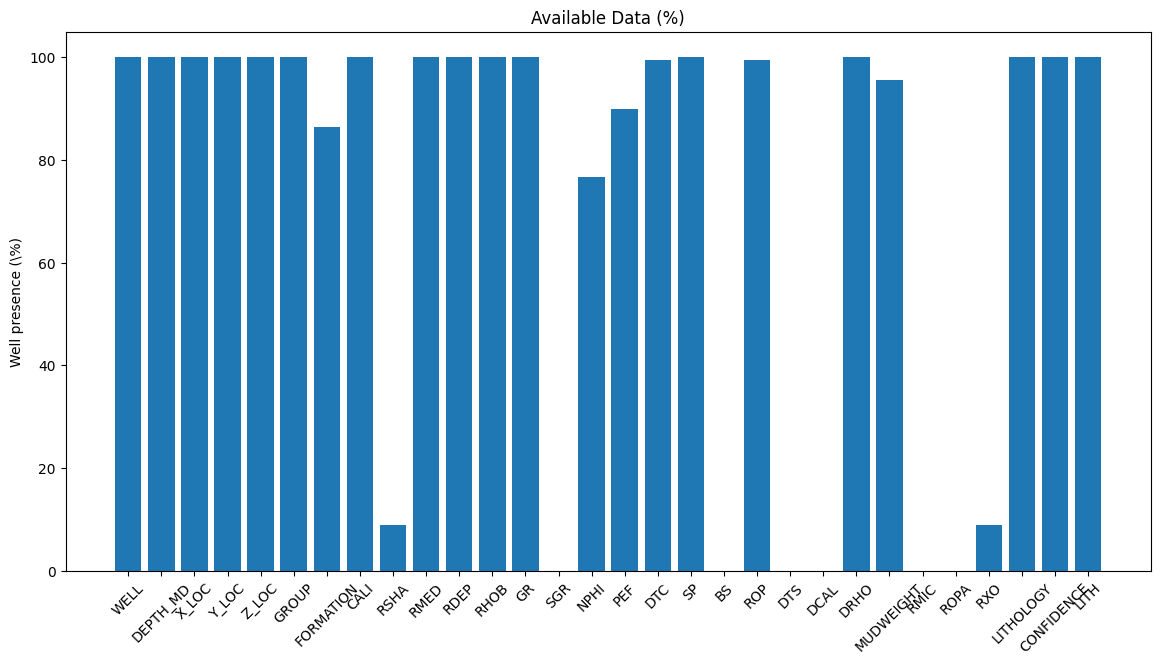

In [35]:
plot_available_data(well_data)

In [36]:
def plot_missingno(data):
    
    #ensure data is sorted by depth
    missingno.matrix(data)
    colors = ["g", "w"]
    gray_patch = mpatches.Patch(color='green', label='Data present')
    white_patch = mpatches.Patch(color='white', label='Data absent ')
    plt.ylabel(f'{data['DEPTH_MD'].min()}, {data['DEPTH_MD'].max()}')
    plt.show()

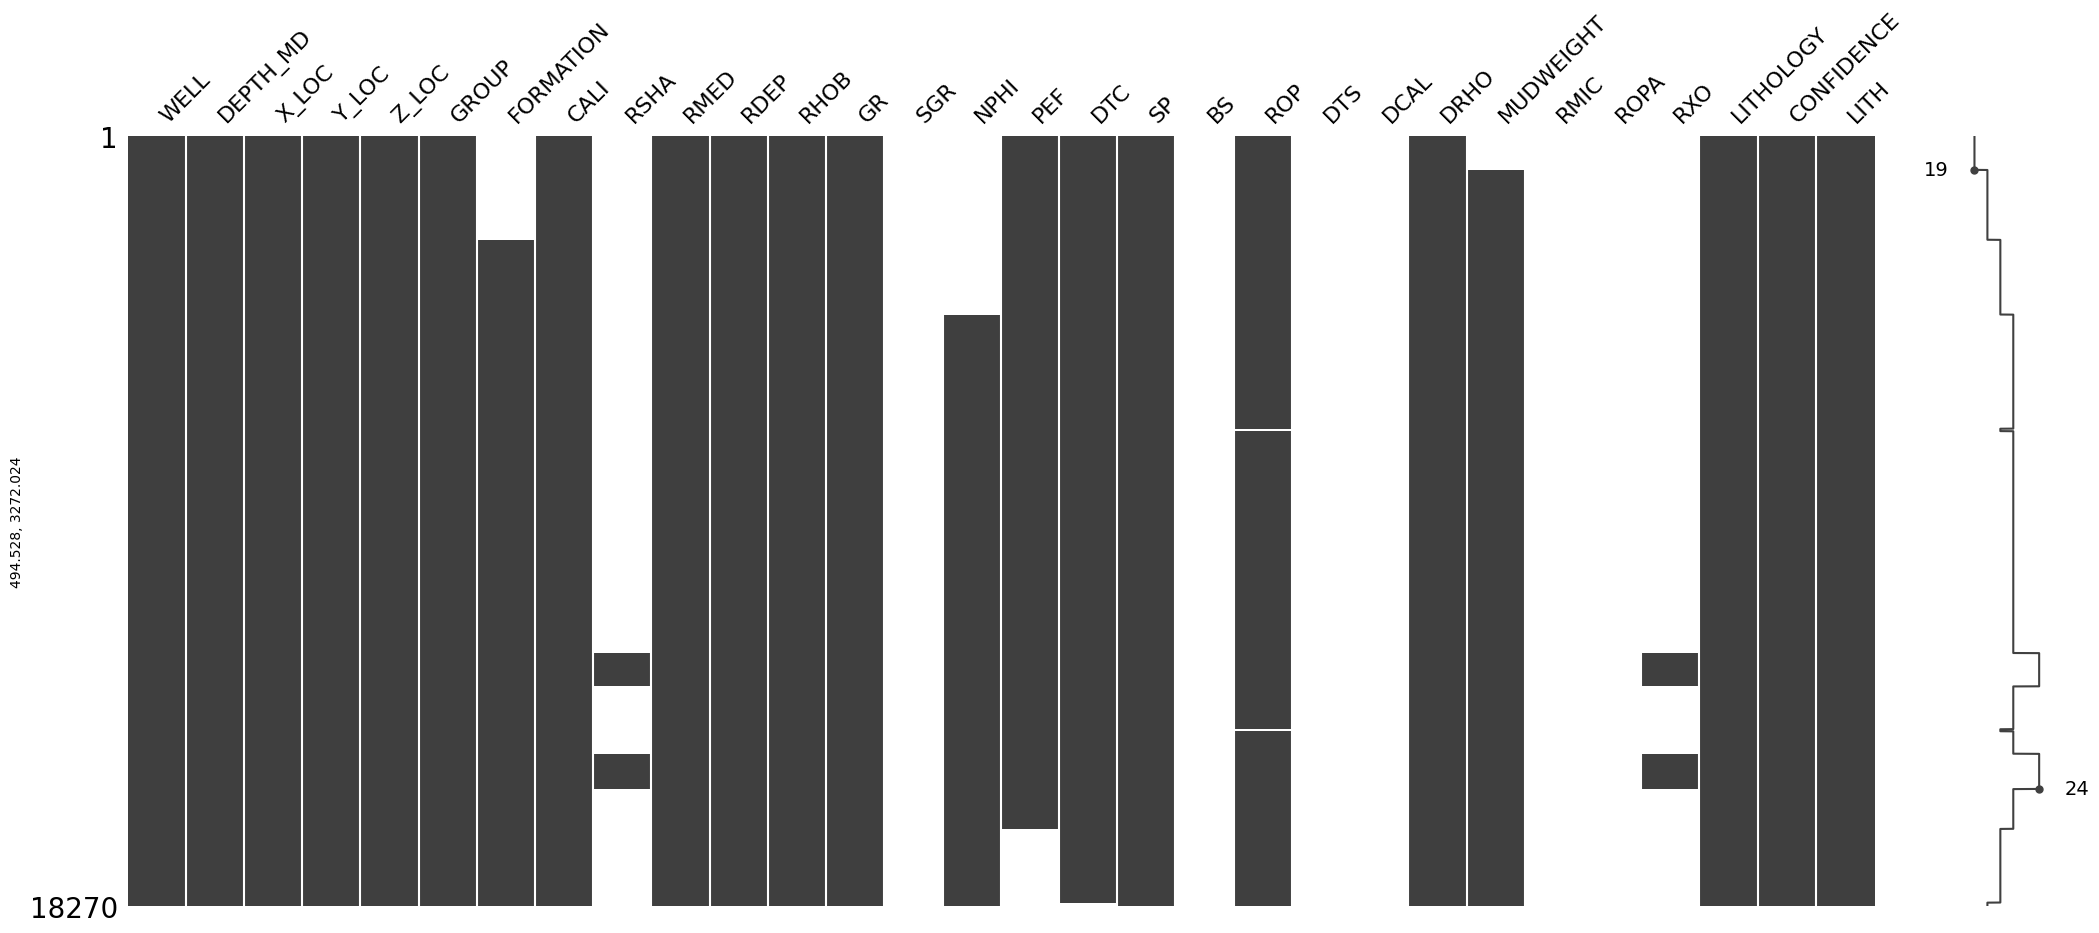

In [37]:
plot_missingno(well_data)

In [38]:
well_data

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,LITHOLOGY,CONFIDENCE,LITH
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0,Shale
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0,Shale
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0,Shale
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0,Shale
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0,Shale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18265,15/9-13,3271.416,437593.40625,6470983.0,-3245.549316,ZECHSTEIN GP.,Smith Bank Fm.,8.541623,NaN,8.585064,...,NaN,NaN,-0.005047,0.155774,NaN,NaN,NaN,74000,3.0,Dolomite
18266,15/9-13,3271.568,437593.37500,6470983.0,-3245.700928,ZECHSTEIN GP.,Smith Bank Fm.,8.557213,NaN,8.142556,...,NaN,NaN,0.002087,0.155774,NaN,NaN,NaN,74000,3.0,Dolomite
18267,15/9-13,3271.720,437593.37500,6470983.0,-3245.852539,ZECHSTEIN GP.,Smith Bank Fm.,8.577917,NaN,7.933336,...,NaN,NaN,0.007469,0.155774,NaN,NaN,NaN,74000,3.0,Dolomite
18268,15/9-13,3271.872,437593.37500,6470983.0,-3246.004395,ZECHSTEIN GP.,Smith Bank Fm.,8.478219,NaN,7.837981,...,NaN,NaN,0.010048,0.155774,NaN,NaN,NaN,74000,3.0,Dolomite


# Boxplot

In [39]:
df.iloc[:,2:]

,CALI,RMED,RDEP,RHOB,GR,NPHI,BS,PEF,DTC,SP
0,19.480835,1.611410,1.798681,1.884186,80.200851,NaN,NaN,20.915468,161.131180,24.612379
1,19.468800,1.618070,1.795641,1.889794,79.262886,NaN,NaN,19.383013,160.603470,23.895531
2,19.468800,1.626459,1.800733,1.896523,74.821999,NaN,NaN,22.591518,160.173615,23.916357
3,19.459282,1.621594,1.801517,1.891913,72.878922,NaN,NaN,32.191910,160.149429,23.793688
4,19.453100,1.602679,1.795299,1.880034,71.729141,NaN,NaN,38.495632,160.128342,24.104078
...,...,...,...,...,...,...,...,...,...,...
1170506,8.423170,NaN,NaN,2.527984,77.654900,NaN,8.5,4.586425,NaN,NaN
1170507,8.379244,NaN,NaN,2.537613,75.363937,NaN,8.5,7.019858,NaN,NaN
1170508,8.350248,NaN,NaN,2.491860,66.452843,NaN,8.5,9.049782,NaN,NaN
1170509,8.313779,NaN,NaN,2.447539,55.784817,NaN,8.5,8.903917,NaN,NaN


<Axes: >

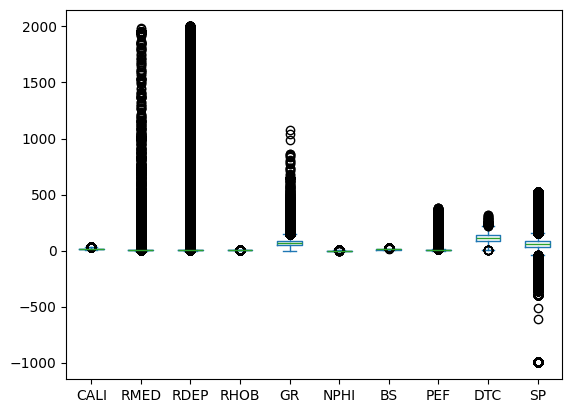

In [40]:
df.iloc[:,2:].plot(kind='box')

C:\Users\promi\AppData\Local\Temp\ipykernel_488\1251701764.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df['BS'], orient="h", palette="Set2")


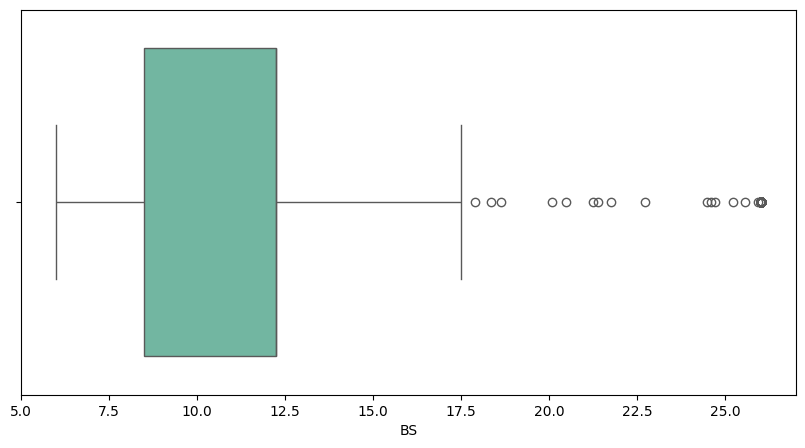

In [41]:
fig, ax = plt.subplots(figsize=(10, 5))
bottom, top = ax.get_ylim()
ax = sns.boxplot(data=df['BS'], orient="h", palette="Set2")

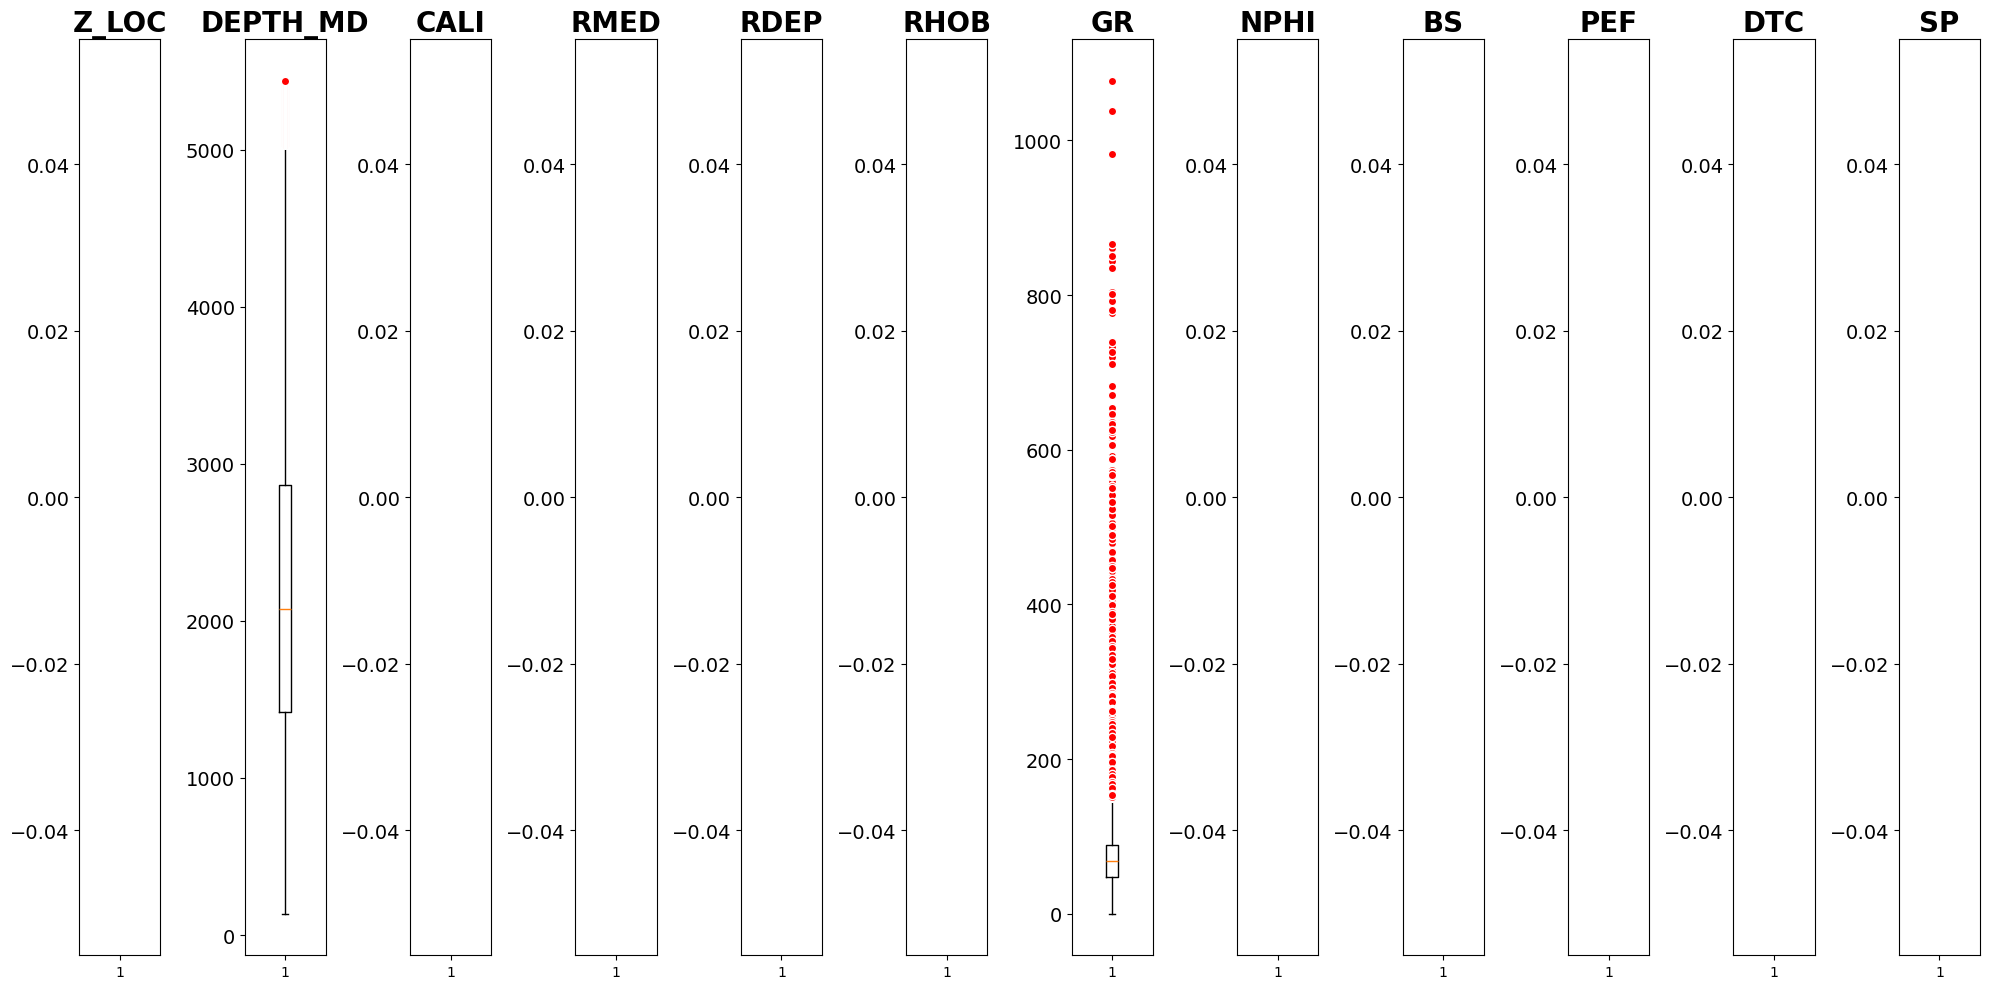

In [42]:
#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

In [43]:
well_data.columns

Index(['WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION',
       'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR', 'NPHI', 'PEF',
       'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO', 'MUDWEIGHT', 'RMIC',
       'ROPA', 'RXO', 'LITHOLOGY', 'CONFIDENCE', 'LITH'],
      dtype='object')

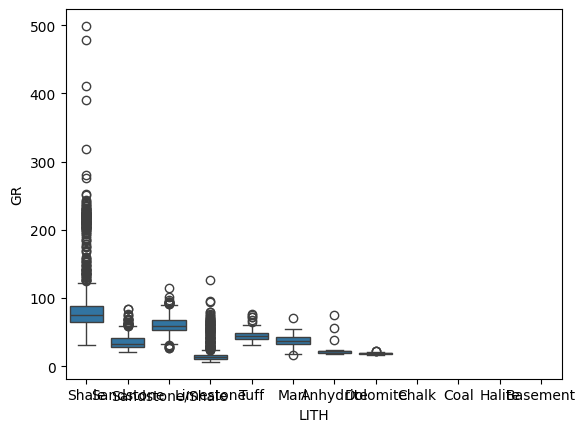

In [44]:
sns.boxplot( x=data['LITH'], y=well_data['GR']);

# Scatter

<Axes: xlabel='RHOB', ylabel='NPHI'>

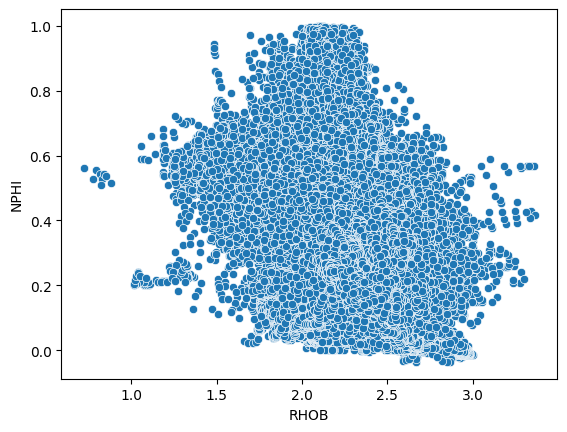

In [45]:
sns.scatterplot(data=data, x='RHOB', y='NPHI')

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not array(['Shale', 'Shale', 'Shale', ..., 'Sandstone/Shale',
       'Sandstone/Shale', 'Sandstone/Shale'], dtype=object)

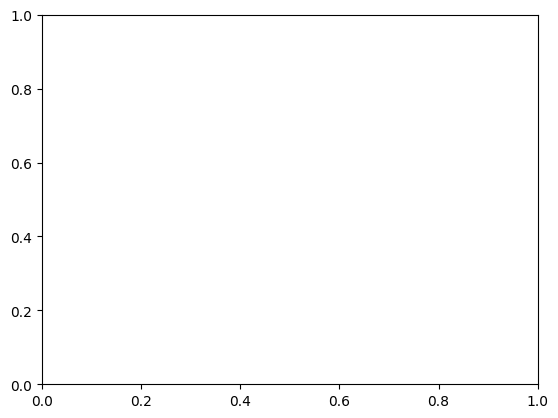

In [46]:
data.plot(kind="scatter", x="NPHI", y="RHOB", c="LITH", 
          colormap="YlOrRd_r", ylim=(3,2))

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(well_data["NPHI"], well_data["RHOB"], well_data["LITH"], alpha= 0.3, c="r")

In [ ]:
g = sns.FacetGrid(data, col='WELL', hue='LITH', col_wrap=4)
g.map(sns.scatterplot, 'NPHI', 'RHOB', linewidth=1, size=0.1, marker='+')
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))
g.add_legend()

## stop

In [ ]:
make_facies_log_plot(logs[well==train_well[well_no]], ['GR', 'RHOB', 'NPHI', 'GROUP2'],
                     train_well[well_no],
                     facies_colors)

In [ ]:
facies_colors = ['darkorange', '#228B22', 'grey', 'cyan', 'gold', 'lightseagreen', 
                 'lawngreen', 'lightblue', 'tan', '#FF4500', 'magenta', '#000000']

In [ ]:

colours=['b','r','g','m','c','lime','gold','sienna']

In [ ]:
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [ ]:
plt.yscale("log")
 
plt.plot(well_data)

In [ ]:
logs=well_data.copy()
curves =['GR', 'RDEP', 'RHOB', 'NPHI']
well_name=logs['WELL'].unique()
    
#make sure logs are sorted by depth
cmap_facies = colors.ListedColormap(facies_colors, 'indexed')

colours=['b','r','g','m','c','lime','gold','sienna']

ztop=logs.Z_LOC.min(); zbot=logs.Z_LOC.max()



cluster=np.repeat(logs['LITHOLOGY'].values.reshape(-1, 1),50,axis=1)

num_curves = len(curves)
f, ax = plt.subplots(nrows=1, ncols=num_curves+1, figsize=(num_curves*2, 12))

for ic, col in enumerate(curves):
    
    # if the curve doesn't exist, make it zeros
    if np.all(np.isnan(logs[col])):
        curve = np.empty(logs[col].values.shape)
        curve[:] = np.nan      
    else:
        curve = logs[col]

    if col == 'GR' or col=='GAMMA':
        ax[ic].plot(curve, logs.Z_LOC, 'green')
        ax[ic].set_xlabel(col)
        ax[ic].set_xlim(0, 200)
        ax[ic].title.set_color('green')
        # ax[ic].spines["top"].set_edgecolor("green")
        # ax[ic].set_xticks([0, 50, 100, 150, 200, curve.max()])
    elif col== 'RDEP' or col== 'MERD' or col== 'RSHA':
        ax[ic].plot(curve, logs.Z_LOC, 'red')
        ax[ic].set_xlabel(col)
        ax[ic].set_xscale("log")
        # ax[ic].set_xlim(0, 200)
        # ax[ic].title.set_color('red')
    
        
    else:
        ax[ic].plot(curve, logs.Z_LOC,colours[ic])
        ax[ic].set_xlabel(col)
        if ic != 0:
            ax[ic].set_yticklabels([]);

# make the lithfacies column
ax[num_curves].plot(logs['LITHOLOGY'], logs['Z_LOC'], color='black')
ax[num_curves].set_xlim(0, 1)

for key in lithology_numbers.keys():
    color = lithology_numbers[key]['color']
    hatch = lithology_numbers[key]['hatch']
    ax[num_curves].fill_betweenx(logs['Z_LOC'], 0, logs['LITHOLOGY'], where=(logs['LITHOLOGY']==key),
                     facecolor=color, hatch=hatch)


for i in range(len(ax)):
    # ax[i].set_ylim(ztop,zbot)
    ax[i].set_ylim(ztop,0)
    #ax[i].invert_yaxis()
    ax[i].grid()
    # ax[i].locator_params(axis='x', nbins=3)

ax[0].set_ylabel("DEPTH")
ax[num_curves].set_xlabel('Lithology')
ax[num_curves].set_yticklabels([])
ax[num_curves].set_xticklabels([])

f.suptitle('Well: %s'% well_name, fontsize=14,y=0.94)   

In [ ]:
zbot

In [ ]:
def make_facies_log_plot(logs, curves, facies_colors):
    well_name=logs['WELL'].unique()
        
    #make sure logs are sorted by depth
    cmap_facies = colors.ListedColormap(facies_colors, 'indexed')

    colours=['b','r','g','m','c','lime','gold','sienna']
    
    ztop=logs.Z_LOC.min(); zbot=logs.Z_LOC.max()
    
    

    cluster=np.repeat(logs['LITHOLOGY'].values.reshape(-1, 1),50,axis=1)
    
    num_curves = len(curves)
    f, ax = plt.subplots(nrows=1, ncols=num_curves+1, figsize=(num_curves*2, 12))
    
    for ic, col in enumerate(curves):
        
        # if the curve doesn't exist, make it zeros
        if np.all(np.isnan(logs[col])):
            curve = np.empty(logs[col].values.shape)
            curve[:] = np.nan
            
        else:
            curve = logs[col]
            
        ax[ic].plot(curve, logs.Z_LOC,colours[ic])
        ax[ic].set_xlabel(col)
        if ic != 0:
            ax[ic].set_yticklabels([]);

    # make the lithfacies column
    im=ax[num_curves].imshow(cluster, interpolation='none', aspect='auto',
                    cmap=cmap_facies,vmin=0,vmax=len(facies_colors)-1)
    
    divider = make_axes_locatable(ax[num_curves])
    cax = divider.append_axes("right", size="20%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((11*' ').join(['  SS', 'SS-Sh', 'Sh', 
                                ' Marl', 'Dol', 'Lims', 'Chlk ', 
                                '  Hal', 'Anhy', 'Tuf', 'Coal', 'Bsmt']))
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
    
    for i in range(len(ax)-1):
        ax[i].set_ylim(ztop,zbot)
        #ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)

    ax[0].set_ylabel("DEPTH")
    ax[num_curves].set_xlabel('Lithology')
    ax[num_curves].set_yticklabels([])
    ax[num_curves].set_xticklabels([])
    
    f.suptitle('Well: %s'% well_name, fontsize=14,y=0.94)   

In [ ]:
# lithology_numbers = {30000: 0,
#                         65030: 1,
#                         65000: 2,
#                         80000: 3,
#                         74000: 4,
#                         70000: 5,
#                         70032: 6,
#                         88000: 7,
#                         86000: 8,
#                         99000: 9,
#                         90000: 10,
#                         93000: 11}
# well_data['LITHOLOGY']= well_data['LITHOLOGY'].map(lithology_numbers)

In [ ]:

lithology_numbers = {30000: {'lith':'Sandstone', 'lith_num':1, 'hatch': '..', 'color':'#ffff00'},
                 65030: {'lith':'Sandstone/Shale', 'lith_num':2, 'hatch':'-.', 'color':'#ffe119'},
                 65000: {'lith':'Shale', 'lith_num':3, 'hatch':'--', 'color':'#bebebe'},
                 80000: {'lith':'Marl', 'lith_num':4, 'hatch':'', 'color':'#7cfc00'},
                 74000: {'lith':'Dolomite', 'lith_num':5, 'hatch':'-/', 'color':'#8080ff'},
                 70000: {'lith':'Limestone', 'lith_num':6, 'hatch':'+', 'color':'#80ffff'},
                 70032: {'lith':'Chalk', 'lith_num':7, 'hatch':'..', 'color':'#80ffff'},
                 88000: {'lith':'Halite', 'lith_num':8, 'hatch':'x', 'color':'#7ddfbe'},
                 86000: {'lith':'Anhydrite', 'lith_num':9, 'hatch':'', 'color':'#ff80ff'},
                 99000: {'lith':'Tuff', 'lith_num':10, 'hatch':'||', 'color':'#ff8c00'},
                 90000: {'lith':'Coal', 'lith_num':11, 'hatch':'', 'color':'black'},
                 93000: {'lith':'Basement', 'lith_num':12, 'hatch':'-|', 'color':'#ef138a'}}

df_lith = pd.DataFrame.from_dict(lithology_numbers, orient='index')
df_lith.index.name = 'LITHOLOGY'
df_lith

In [ ]:
y = [0, 1]
x = [1, 1]

fig, axes = plt.subplots(ncols=4,nrows=3, sharex=True, sharey=True,
                         figsize=(10,5), subplot_kw={'xticks': [], 'yticks': []})
for ax, key in zip(axes.flat, lithology_numbers.keys()):
    ax.plot(x, y)
    ax.fill_betweenx(y, 0, 1, facecolor=lithology_numbers[key]['color'], hatch=lithology_numbers[key]['hatch'])
    ax.set_xlim(0, 0.1)
    ax.set_ylim(0, 1)
    ax.set_title(str(lithology_numbers[key]['lith']))

plt.tight_layout()

plt.show()

In [ ]:
make_facies_log_plot(well_data, ['GR', 'RDEP', 'RHOB', 'NPHI'],
                     facies_colors)

# Plot Well logs